<a href="https://colab.research.google.com/github/thupakulayashwanth482/Image_to_Sketch_Major_Project_Sem1/blob/main/Image_to_Sketch_using_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import matplotlib
import tqdm
from multiprocessing import Pool
from multiprocessing import cpu_count

In [1]:
image_path ='/content/sample_data/img_align_celeba'
sketch_path ='/content/sample_data/celeb_sketch_dataset'
#print(image_path)
#print(sketch_path)

In [3]:
print(os.listdir('/content/sample_data/celeb_sketch_dataset'))

[]


In [4]:
print(os.listdir('/content/sample_data/img_align_celeba'))

['000001.jpg', '000010.jpg', '000009.jpg', '000028.jpg', '000002.jpg']


In [5]:
def burnV2(image, mask):
    return 255 - cv2.divide(255-image, 255-mask, scale=256)

In [6]:
def dodgeV2(image, mask):
    return cv2.divide(image, 255-mask, scale=256)

In [14]:
def img_to_sketch(image_names):
    for img in tqdm.notebook.tqdm(image_names):
        img_rgb = cv2.imread(image_path+'/'+img)
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
        img_gray_inv = 255 - img_gray
        img_blur = cv2.GaussianBlur(img_gray_inv, ksize=(21, 21),
                            sigmaX=0, sigmaY=0)
        img_blend = dodgeV2(img_gray, img_blur)
        matplotlib.image.imsave(sketch_path+'/'+img, img_blend,cmap='gray')
        #plt.imshow( img_blend,cmap='gray')
        #plt.show()
        

In [8]:
image_names=os.listdir('/content/sample_data/img_align_celeba')
print(image_names)

['000001.jpg', '000010.jpg', '000009.jpg', '000028.jpg', '000002.jpg']


In [12]:
img_rgb = cv2.imread('/content/sample_data/img_align_celeba/000009.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
img_gray_inv = 255 - img_gray
img_blur = cv2.GaussianBlur(img_gray_inv, ksize=(21, 21),sigmaX=0, sigmaY=0)
img_blend = dodgeV2(img_gray, img_blur)
matplotlib.image.imsave('/content/sample_data/celeb_sketch_dataset/000009_sketch.jpg', img_blend,cmap='gray')


In [20]:
print("[INFO] launching pool using {} processes...".format(8))
pool = Pool(processes=8)
pool.map(img_to_sketch(image_names),image_names)
# close the pool and wait for all processes to finish
print("[INFO] waiting for processes to finish...")
pool.close()
pool.join()
print("[INFO] multiprocessing complete")

[INFO] launching pool using 8 processes...


  0%|          | 0/5 [00:00<?, ?it/s]

TypeError: ignored

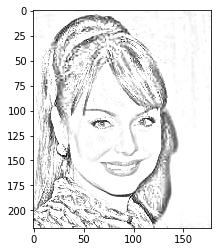

In [17]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
img_gray_inv = 255 - img_gray
img_blur = cv2.GaussianBlur(img_gray_inv, ksize=(21, 21),sigmaX=0, sigmaY=0)
img_blend = dodgeV2(img_gray, img_blur)
plt.imshow( img_blend,cmap='gray')
plt.show()

In [16]:
print(os.listdir('/content/sample_data/celeb_sketch_dataset'))

['000001.jpg', '000010.jpg', '000009.jpg', '000028.jpg', '000002.jpg', '000009_sketch.jpg']
